In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from tqdm import tqdm
from collections import defaultdict, Counter
import seaborn as sns
import os
import time
import seaborn as sns

In [2]:
path='/home/jupyter/Patch_extraction/'
base = '/home/jupyter/Patch_extraction/'

In [3]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [4]:
# def patch_selection(ids,i):
#     data = []

#     for id in tqdm(ids):
#         try:
#             files1 = os.listdir(os.path.join(base+'/'+str(i)+'/', id))
#             # Randomly select 100 images if there are more than 100
#             if len(files1) > 100:
#                 selected_files = random.sample(files1, 100)
#             else:
#                 selected_files = files1

#             for x in selected_files:
#                 data.append(os.path.join(base+'/'+str(i)+'/', id, x))
#         except FileNotFoundError:
#             pass
        
#     return data 


def patch_selection(ids, i):
    data = []
    labels = []

    for id in tqdm(ids):
        try:
            files1 = os.listdir(os.path.join(base, str(i), id))
            # Randomly select 100 images if there are more than 100
            # if len(files1) > 100:
                # selected_files = random.sample(files1, 50)
            # else:
            selected_files = files1

            for x in selected_files:
                data.append(os.path.join(base, str(i), id, x))
                labels.append(i)  # Append the class label based on the folder name
        except FileNotFoundError:
            pass

    return data, labels


In [5]:

train_patch_ids = []
train_labels = []
test_patch_ids = []
test_labels = []

for i in range(0, 17):
    # List all file IDs in the directory
    ids = os.listdir(base + '/' + str(i) + '/')
    
    # Ensure at most 10 slides are selected
    if len(ids) > 10:
        ids = random.sample(ids, 10)
        
    print(i)
    print(ids)
    print('\n')
    
    # Split the IDs into training and validation sets
    train_ids, test_ids = train_test_split(ids, test_size=0.2, random_state=42)
    
    # Assuming patch_selection function selects patches from given ids and class index
    train_patch_id, train_label = patch_selection(train_ids, i)
    test_patch_id, test_label = patch_selection(test_ids, i)
    
    train_patch_ids.extend(train_patch_id)
    train_labels.extend(train_label)
    test_patch_ids.extend(test_patch_id)
    test_labels.extend(test_label)
   

0
['78413', '76624', '78589', '76983', '76363', '77425', '77319', '77490', '77330', '76639']




100%|██████████| 2/2 [00:00<00:00, 213.46it/s]


1
['77498', '77096', '76559', '78630', '77448', '78673', '78424', '78689', '77620', '76621']




100%|██████████| 2/2 [00:00<00:00, 136.18it/s]


2
['77135', '76561', '77463', '77204', '77384', '78408', '76365', '77459', '78747', '76842']




100%|██████████| 2/2 [00:00<00:00, 225.70it/s]

3
['76515', '76386', '76767', '76784', '76702', '76453', '77104', '76334', '76430', '76785']





100%|██████████| 2/2 [00:00<00:00, 95.66it/s]


4
['76583', '76462', '78648', '78706', '76850', '78688', '76610', '76402', '76937', '76518']




100%|██████████| 2/2 [00:00<00:00, 140.08it/s]


5
['76580', '78351', '76458', '76579', '76556', '76632', '78085', '78353', '76557', '78352']




100%|██████████| 2/2 [00:00<00:00, 193.09it/s]


6
['76939', '77270', '77283', '76846', '76988', '77329', '76454', '76736', '76968', '76739']




100%|██████████| 2/2 [00:00<00:00, 119.27it/s]


7
['78412', '77522', '78711', '78651', '76957', '77083', '76892', '76791', '76316', '76929']




100%|██████████| 2/2 [00:00<00:00, 2850.36it/s]


8
['76844', '77098', '78333', '76391', '76970', '77501', '76796', '77438', '77022', '77328']




100%|██████████| 2/2 [00:00<00:00, 138.72it/s]


9
['77049', '76506', '78398', '77130', '76527', '78342', '78667', '76439', '77311', '76810']




100%|██████████| 2/2 [00:00<00:00, 134.23it/s]


10
['78431', '77451', '78438', '78105', '77254', '76582', '78432', '77450']




100%|██████████| 2/2 [00:00<00:00, 177.09it/s]


11
['77435', '77029', '76585', '77028', '76475', '76897', '77030']




100%|██████████| 2/2 [00:00<00:00, 183.38it/s]


12
['78461', '78629', '77398', '77037', '76507', '76387', '76605', '78568', '78578', '76683']




100%|██████████| 2/2 [00:00<00:00, 301.90it/s]


13
['78456', '78371', '78542', '77053', '76679', '76678', '77372', '77113', '78372', '77360']




100%|██████████| 2/2 [00:00<00:00, 502.91it/s]


14
['76447', '78470', '76623', '78406', '76622', '78106', '78602', '78407', '76446', '77395']




100%|██████████| 2/2 [00:00<00:00, 226.18it/s]


15
['76569', '76384', '76633', '76318', '77008', '78605', '77021', '76570', '77423']




100%|██████████| 2/2 [00:00<00:00, 141.31it/s]


16
['76431', '77073', '78540', '76636', '76432', '76634', '76635', '78537', '76445']




100%|██████████| 2/2 [00:00<00:00, 176.87it/s]


In [6]:
print(len(train_patch_ids))
print(len(test_patch_ids))

353923
85969


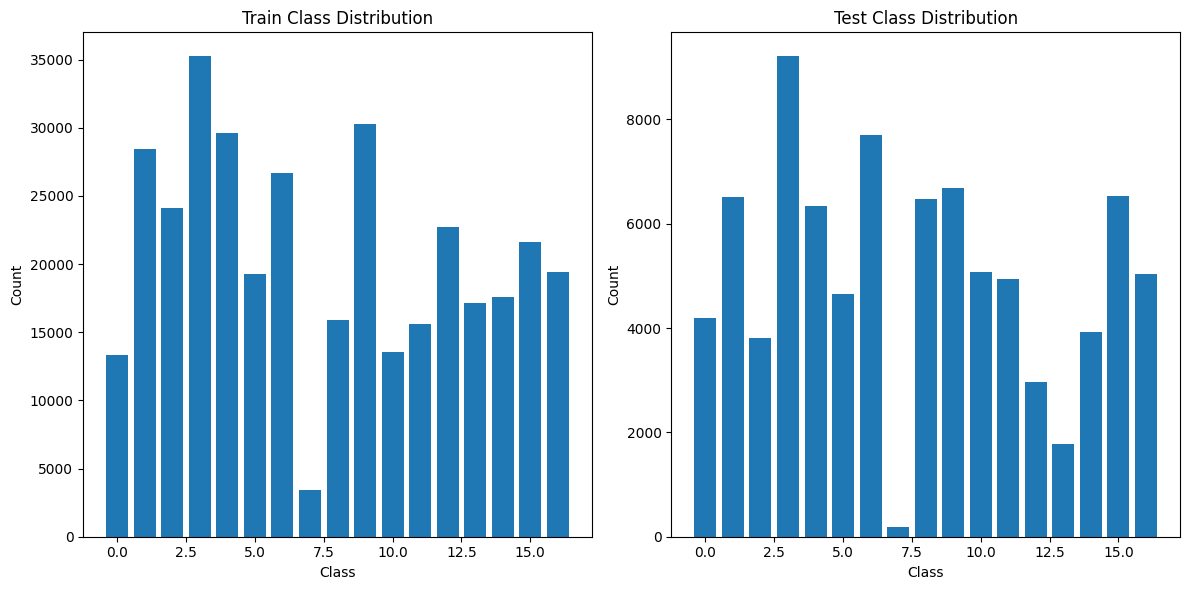

Train class distribution: [13321. 28435. 24136. 35233. 29643. 19304. 26647.  3459. 15897. 30287.
 13524. 15624. 22707. 17112. 17603. 21581. 19410.]
Test class distribution: [4185. 6508. 3810. 9210. 6338. 4645. 7696.  180. 6468. 6690. 5079. 4932.
 2967. 1772. 3922. 6536. 5031.]


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

def get_class_distribution_from_filenames(filenames, custom_classes):
    class_counts = np.zeros(len(custom_classes))
    class_map = {cls: idx for idx, cls in enumerate(custom_classes)}
    
    for filename in filenames:
        # Extract class label from the directory name
        class_label = int(os.path.basename(os.path.dirname(os.path.dirname(filename))))
        if class_label in class_map:
            class_counts[class_map[class_label]] += 1
    
    return class_counts

# Define your custom range of class labels
custom_range = list(range(0, 17))

# Assuming train_patch_ids and test_patch_ids are lists of image paths for training and testing
train_class_distribution = get_class_distribution_from_filenames(train_patch_ids, custom_range)
test_class_distribution = get_class_distribution_from_filenames(test_patch_ids, custom_range)

# Plotting class distributions
classes = np.array(custom_range)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(classes, train_class_distribution)
plt.title('Train Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(classes, test_class_distribution)
plt.title('Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print distributions as arrays
print("Train class distribution:", train_class_distribution)
print("Test class distribution:", test_class_distribution)


In [8]:
class CustomDataset(Dataset):
    def __init__(self, list_IDs, labels, transform=None):
        self.list_IDs = list_IDs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.list_IDs)

    def __getitem__(self, index):
        ID = self.list_IDs[index]
        label = self.labels[index]
        image = Image.open(ID).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [9]:
train_IDs, val_IDs, train_labels, val_labels = train_test_split(train_patch_ids, train_labels, test_size=0.2, random_state=42)

In [10]:
# Define the data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Prepare datasets and data loaders
train_dataset = CustomDataset(train_IDs, train_labels, transform=train_transform)
val_dataset = CustomDataset(val_IDs, val_labels, transform=val_transform)
test_dataset = CustomDataset(test_patch_ids, test_labels, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [11]:
print(len(train_loader))

2213


In [12]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [13]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from tqdm import tqdm
# import time

# def training(train_loader, val_loader, learn_rate, EPOCHS, model, filename):

#     if torch.cuda.is_available():
#         model.cuda()

#     # Defining loss function and optimizer
#     criterion = nn.CrossEntropyLoss()

#     optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learn_rate)

#     best_val_loss = float('inf')
#     patience = 10
#     patience_counter = 0

#     for epoch in range(EPOCHS):
#         model.train()
#         running_loss = 0.0
#         running_corrects = 0
#         epoch_start_time = time.time()

#         # Initialize tqdm progress bar
#         train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}', unit='batch')

#         for batch_idx, (inputs, labels) in enumerate(train_loader_tqdm):
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()

#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             _, preds = torch.max(outputs, 1)
#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#             batch_loss = running_loss / ((batch_idx + 1) * train_loader.batch_size)
#             batch_acc = running_corrects.double() / ((batch_idx + 1) * train_loader.batch_size)

#             # Calculate and display ETA
#             batch_end_time = time.time()
#             batch_duration = batch_end_time - epoch_start_time
#             eta = batch_duration * (len(train_loader) - batch_idx - 1) / (batch_idx + 1)

#             # Update tqdm progress bar with current loss, accuracy, and ETA less frequently
#             if batch_idx % 10 == 0:
#                 train_loader_tqdm.set_postfix(
#                     loss=batch_loss,
#                     accuracy=batch_acc,
#                     ETA=f"{eta/60:.2f} min"
#                 )

#         epoch_loss = running_loss / len(train_loader.dataset)
#         epoch_acc = running_corrects.double() / len(train_loader.dataset)

#         print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

#         model.eval()
#         val_loss = 0.0
#         val_corrects = 0

#         with torch.no_grad():
#             for inputs, labels in val_loader:
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)

#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)

#                 _, preds = torch.max(outputs, 1)
#                 val_loss += loss.item() * inputs.size(0)
#                 val_corrects += torch.sum(preds == labels.data)

#         val_loss /= len(val_loader.dataset)
#         val_acc = val_corrects.double() / len(val_loader.dataset)

#         print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}")

#         # Save the model at the end of each epoch if validation loss improves
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             torch.save(model.state_dict(), filename)
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         if patience_counter >= patience:
#             print(f"Stopping early after {epoch+1} epochs")
#             break

#     return model


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import time

def training(train_loader, val_loader, learn_rate, EPOCHS, model, filename):

    if torch.cuda.is_available():
        model.cuda()

    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learn_rate)

    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        epoch_start_time = time.time()

        # Initialize tqdm progress bar
        train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}', unit='batch')

        for batch_idx, (inputs, labels) in enumerate(train_loader_tqdm):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            batch_loss = running_loss / ((batch_idx + 1) * train_loader.batch_size)
            batch_acc = running_corrects.double() / ((batch_idx + 1) * train_loader.batch_size)

            # Calculate and display ETA
            batch_end_time = time.time()
            batch_duration = batch_end_time - epoch_start_time
            eta = batch_duration * (len(train_loader) - batch_idx - 1) / (batch_idx + 1)

            # Update tqdm progress bar with current loss, accuracy, and ETA
            train_loader_tqdm.set_postfix(
                loss=batch_loss,
                accuracy=batch_acc,
                ETA=f"{eta/60:.2f} min"
            )

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}")

        # Save the model at the end of each epoch if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break

    return model


In [15]:

# class ClassificationModel(nn.Module):
#     def __init__(self, num_classes=17):
#         super(ClassificationModel, self).__init__()
#         base_model = models.mobilenet_v2(pretrained=True)
#         self.features = base_model.features  # Use the feature extractor part
#         self.pool = nn.AdaptiveAvgPool2d(1)  # Add an adaptive pooling layer
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(base_model.last_channel, 2048),
#             nn.ReLU(),
#             nn.BatchNorm1d(2048),
#             nn.Dropout(0.5),
#             nn.Linear(2048, num_classes)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = self.pool(x)  # Apply adaptive pooling
#         x = self.classifier(x)
#         return x

# def freezing_layers(model):
#     for param in model.features.parameters():
#         param.requires_grad = False

In [16]:
# import torch
# import torch.nn as nn
# from torchvision import models, transforms

# class ClassificationModel(nn.Module):
#     def __init__(self, num_classes=17):
#         super(ClassificationModel, self).__init__()
#         base_model = models.vit_b_16(pretrained=True)
#         self.features = base_model
#         self.classifier = nn.Linear(base_model.heads.head.in_features, num_classes)
#         self.features.heads = self.classifier

#     def forward(self, x):
#         x = self.features(x)
#         return x

# def freezing_layers(model):
#     for param in model.features.parameters():
#         param.requires_grad = False
#     for param in model.classifier.parameters():
#         param.requires_grad = True


In [17]:
class ClassificationModel(nn.Module):
    def __init__(self, num_classes=17):
        super(ClassificationModel, self).__init__()
        base_model = models.efficientnet_b0(pretrained=True)
        self.features = nn.Sequential(*list(base_model.children())[:-1])  # Exclude the classifier layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(base_model.classifier[1].in_features, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

def freezing_layers(model):
    for param in model.features.parameters():
        param.requires_grad = False

In [18]:
model = ClassificationModel(num_classes=17)
freezing_layers(model)

learn_rate = 0.001
EPOCHS = 2
filename = 'best_model.pth'

model = training(train_loader, val_loader, learn_rate, EPOCHS, model, filename)



/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/2: 100%|██████████| 2213/2213 [12:03:36<00:00, 19.62s/batch, ETA=0.00 min, accuracy=tensor(0.7251, dtype=torch.float64), loss=0.91]     


Epoch 1/2, Loss: 0.9102, Acc: 0.7254
Validation Loss: 0.5104, Validation Acc: 0.8471


Epoch 2/2: 100%|██████████| 2213/2213 [13:53:41<00:00, 22.60s/batch, ETA=0.00 min, accuracy=tensor(0.7845, dtype=torch.float64), loss=0.709]    


Epoch 2/2, Loss: 0.7091, Acc: 0.7848
Validation Loss: 0.4024, Validation Acc: 0.8761


Test Loss: 3.8261, Test Acc: 0.5116

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.19      0.26      4185
           1       0.86      0.78      0.82      6508
           2       0.03      0.02      0.02      3810
           3       0.64      0.98      0.77      9210
           4       0.35      0.32      0.33      6338
           5       0.59      0.83      0.69      4645
           6       0.53      0.81      0.64      7696
           7       0.28      0.16      0.20       180
           8       0.46      0.17      0.24      6468
           9       0.66      0.96      0.78      6690
          10       0.11      0.04      0.06      5079
          11       0.36      0.46      0.40      4932
          12       0.16      0.16      0.16      2967
          13       0.38      0.60      0.46      1772
          14       0.82      0.96      0.89      3922
          15       0.26      0.19      0.22      6536
          16       0

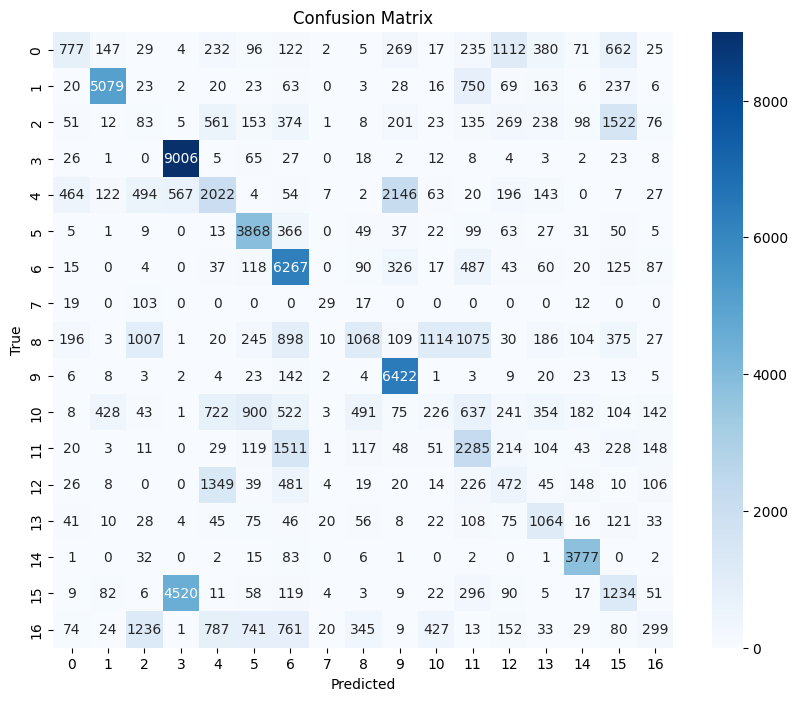

In [19]:
# Load the best model for evaluation
model.load_state_dict(torch.load(filename))
model.eval()

test_loss = 0.0
test_corrects = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels)

        _, preds = torch.max(outputs, 1)
        test_loss += loss.item() * inputs.size(0)
        test_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader.dataset)
test_acc = test_corrects.double() / len(test_loader.dataset)

print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Generate classification report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(17)]))

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(17)], yticklabels=[str(i) for i in range(17)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
